In [2]:
import pandas as pd
import requests

In [6]:
csv_file_path = '../data/rust_stars.csv'

# Leer el archivo CSV
users_data = pd.read_csv(csv_file_path)
users_data

,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,gists_url,starred_url,subscriptions_url,organizations_url,repos_url,events_url,received_events_url,type,user_view_type,site_admin
0,topfunky,26,MDQ6VXNlcjI2,https://avatars.githubusercontent.com/u/26?v=4,NaN,https://api.github.com/users/topfunky,https://github.com/topfunky,https://api.github.com/users/topfunky/followers,https://api.github.com/users/topfunky/followin...,https://api.github.com/users/topfunky/gists{/g...,https://api.github.com/users/topfunky/starred{...,https://api.github.com/users/topfunky/subscrip...,https://api.github.com/users/topfunky/orgs,https://api.github.com/users/topfunky/repos,https://api.github.com/users/topfunky/events{/...,https://api.github.com/users/topfunky/received...,User,public,False
1,brixen,85,MDQ6VXNlcjg1,https://avatars.githubusercontent.com/u/85?v=4,NaN,https://api.github.com/users/brixen,https://github.com/brixen,https://api.github.com/users/brixen/followers,https://api.github.com/users/brixen/following{...,https://api.github.com/users/brixen/gists{/gis...,https://api.github.com/users/brixen/starred{/o...,https://api.github.com/users/brixen/subscriptions,https://api.github.com/users/brixen/orgs,https://api.github.com/users/brixen/repos,https://api.github.com/users/brixen/events{/pr...,https://api.github.com/users/brixen/received_e...,User,public,False
2,ELLIOTTCABLE,200,MDQ6VXNlcjIwMA==,https://avatars.githubusercontent.com/u/200?v=4,NaN,https://api.github.com/users/ELLIOTTCABLE,https://github.com/ELLIOTTCABLE,https://api.github.com/users/ELLIOTTCABLE/foll...,https://api.github.com/users/ELLIOTTCABLE/foll...,https://api.github.com/users/ELLIOTTCABLE/gist...,https://api.github.com/users/ELLIOTTCABLE/star...,https://api.github.com/users/ELLIOTTCABLE/subs...,https://api.github.com/users/ELLIOTTCABLE/orgs,https://api.github.com/users/ELLIOTTCABLE/repos,https://api.github.com/users/ELLIOTTCABLE/even...,https://api.github.com/users/ELLIOTTCABLE/rece...,User,public,False
3,vic,331,MDQ6VXNlcjMzMQ==,https://avatars.githubusercontent.com/u/331?v=4,NaN,https://api.github.com/users/vic,https://github.com/vic,https://api.github.com/users/vic/followers,https://api.github.com/users/vic/following{/ot...,https://api.github.com/users/vic/gists{/gist_id},https://api.github.com/users/vic/starred{/owne...,https://api.github.com/users/vic/subscriptions,https://api.github.com/users/vic/orgs,https://api.github.com/users/vic/repos,https://api.github.com/users/vic/events{/privacy},https://api.github.com/users/vic/received_events,User,public,False
4,brainopia,386,MDQ6VXNlcjM4Ng==,https://avatars.githubusercontent.com/u/386?v=4,NaN,https://api.github.com/users/brainopia,https://github.com/brainopia,https://api.github.com/users/brainopia/followers,https://api.github.com/users/brainopia/followi...,https://api.github.com/users/brainopia/gists{/...,https://api.github.com/users/brainopia/starred...,https://api.github.com/users/brainopia/subscri...,https://api.github.com/users/brainopia/orgs,https://api.github.com/users/brainopia/repos,https://api.github.com/users/brainopia/events{...,https://api.github.com/users/brainopia/receive...,User,public,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,dexpota,7031675,MDQ6VXNlcjcwMzE2NzU=,https://avatars.githubusercontent.com/u/703167...,NaN,https://api.github.com/users/dexpota,https://github.com/dexpota,https://api.github.com/users/dexpota/followers,https://api.github.com/users/dexpota/following...,https://api.github.com/users/dexpota/gists{/gi...,https://api.github.com/users/dexpota/starred{/...,https://api.github.com/users/dexpota/subscript...,https://api.github.com/users/dexpota/orgs,https://api.github.com/users/dexpota/repos,https://api.github.com/users/dexpota/events{/p...,https://api.github.com/users/dexpota/received_...,User,public,False
11996,Gela,3746552,MDQ6VXNlcjM3NDY1NTI=,https://avatars.githubusercontent.com/u/374655...,NaN,https://api.github.

In [7]:
## GET THE LOGIN FROM EACH USER (USERNAME)
users_login = []
users_login = users_data['login']
users_login

0             topfunky
1               brixen
2         ELLIOTTCABLE
3                  vic
4            brainopia
             ...      
11995          dexpota
11996             Gela
11997           cflowe
11998    larsbergstrom
11999          edunham
Name: login, Length: 12000, dtype: object

In [10]:
## GET THE REPOS FOR EACH USER
import os
import time
from dotenv import load_dotenv


load_dotenv()
github_key = os.getenv("GITHUB_KEY")
headers = {
        "Accept": "application/vnd.github+json",
        "Authorization": f"Bearer {github_key}"
}

all_repos = []
print(f'loading..')
for idx, user in enumerate(users_login):
    if idx == 500:
        break
    
    if (idx + 1) % 10 == 0:
        print(f"{idx+1} users..")
        print(f"Current repos: {len(all_repos)}")

    base_url = "https://api.github.com"
    repos_from_user_url = f"/users/{user}/repos"
    url = base_url + repos_from_user_url

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        all_repos.extend(data)
    else:
        print(f'error: {response.status_code}')
        break

    # 'don't get banned' check
    # time.sleep(1)


df = pd.json_normalize(
        all_repos, 
        record_path=None, 
        meta=None, 
        errors='ignore'
)

df.head()
df.to_csv('../data/user_repos.csv')
df


loading..
10 users..
Current repos: 270
20 users..
Current repos: 516
30 users..
Current repos: 789
40 users..
Current repos: 1054
50 users..
Current repos: 1338
60 users..
Current repos: 1545
70 users..
Current repos: 1845
80 users..
Current repos: 2027
90 users..
Current repos: 2296
100 users..
Current repos: 2545
110 users..
Current repos: 2829
120 users..
Current repos: 3104
130 users..
Current repos: 3379
140 users..
Current repos: 3626
150 users..
Current repos: 3873
160 users..
Current repos: 4130
170 users..
Current repos: 4383
180 users..
Current repos: 4605
190 users..
Current repos: 4905
200 users..
Current repos: 5108
210 users..
Current repos: 5379
220 users..
Current repos: 5621
230 users..
Current repos: 5811
240 users..
Current repos: 6059
250 users..
Current repos: 6317
260 users..
Current repos: 6551
270 users..
Current repos: 6821
280 users..
Current repos: 7064
290 users..
Current repos: 7362
300 users..
Current repos: 7620
310 users..
Current repos: 7842
320 users.

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,license.name,license.spdx_id,license.url,license.node_id,permissions.admin,permissions.maintain,permissions.push,permissions.triage,permissions.pull,license
0,24363,MDEwOlJlcG9zaXRvcnkyNDM2Mw==,ar_fixtures,topfunky/ar_fixtures,False,https://github.com/topfunky/ar_fixtures,Dumps YAML fixtures from existing data using A...,False,https://api.github.com/repos/topfunky/ar_fixtures,https://api.github.com/repos/topfunky/ar_fixtu...,...,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,False,False,False,False,True,NaN
1,874556416,R_kgDONCCsAA,baseballr,topfunky/baseballr,False,https://github.com/topfunky/baseballr,A package written for R focused on baseball an...,True,https://api.github.com/repos/topfunky/baseballr,https://api.github.com/repos/topfunky/baseball...,...,Other,NOASSERTION,None,MDc6TGljZW5zZTA=,False,False,False,False,True,NaN
2,52452,MDEwOlJlcG9zaXRvcnk1MjQ1Mg==,basic_model,topfunky/basic_model,False,https://github.com/topfunky/basic_model,"A very thin wrapper around CouchRest, for use ...",False,https://api.github.com/repos/topfunky/basic_model,https://api.github.com/repos/topfunky/basic_mo...,...,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN
3,1441793,MDEwOlJlcG9zaXRvcnkxNDQxNzkz,bigapp,topfunky/bigapp,False,https://github.com/topfunky/bigapp,An application with many files. For testing only.,False,https://api.github.com/repos/topfunky/bigapp,https://api.github.com/repos/topfunky/bigapp/f...,...,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN
4,68860702,MDEwOlJlcG9zaXRvcnk2ODg2MDcwMg==,blog-comments,topfunky/blog-comments,False,https://github.com/topfunky/blog-comments,Issues and comments related to the blog at htt...,False,https://api.github.com/repos/topfunky/blog-com...,https://api.github.com/repos/topfunky/blog-com...,...,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12353,16870929,MDEwOlJlcG9zaXRvcnkxNjg3MDkyOQ==,canvas-game,ready4god2513/canvas-game,False,https://github.com/ready4god2513/canvas-game,None,False,https://api.github.com/repos/ready4god2513/can...,https://api.github.com/repos/ready4god2513/can...,...,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN
12354,8640420,MDEwOlJlcG9zaXRvcnk4NjQwNDIw,carrierwave-ftp,ready4god2513/carrierwave-ftp,False,https://github.com/ready4god2513/carrierwave-ftp,Allows file upload using FTP for CarrierWave u...,True,https://api.github.com/repos/ready4god2513/car...,https://api.github.com/repos/ready4god2513/car...,...,MIT License,MIT,https://api.github.com/licenses/mit,MDc6TGljZW5zZTEz,False,False,False,False,True,NaN
12355,22035880,MDEwOlJlcG9zaXRvcnkyMjAzNTg4MA==,cayley-ruby,ready4god2513/cayley-ruby,False,https://github.com/ready4god2513/cayley-ruby,A Ruby library for working with Google's Cayle...,True,https://api.github.com/repos/ready4god2513/cay...,https://api.github.com/repos/ready4god2513/cay...,...,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN
12356,2187803,MDEwOlJlcG9zaXRvcnkyMTg3ODAz,ChatterBee,ready4god2513/ChatterBee,False,https://github.com/ready4god2513/ChatterBee,A simple chat app using pubnub,False,https://api.github.com/repos/ready4god2513/Cha...,https://api.github.com/repos/ready4god2513/Cha...,...,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN


In [5]:
# LOAD DATA
user_repo_path = '../data/user_repos.csv'
users_data_path = '../data/rust_stars.csv'
user_repos_raw = pd.read_csv(user_repo_path, usecols=['owner.login', 'name', 'forks_count', 'stargazers_count', 'watchers_count', 'size', 'default_branch', 'open_issues_count', 'has_issues', 'has_downloads', 'has_wiki', 'has_discussions', 'created_at', 'pushed_at', 'updated_at'])
users_data = pd.read_csv(users_data_path )
user_repos_raw.info()

NameError: name 'pd' is not defined

In [3]:
# ORDER DATA
user_repos_raw = user_repos_raw.dropna()
user_repos = user_repos_raw[['owner.login', 'name', 'forks_count', 'stargazers_count', 'watchers_count', 'size', 'open_issues_count', 'has_issues', 'has_downloads', 'has_wiki', 'has_discussions', 'default_branch', 'created_at', 'updated_at', 'pushed_at']]
user_repos.columns = ['owner', 'name', 'forks_count', 'stargazers_count', 'watchers_count', 'size', 'open_issues_count', 'has_issues', 'has_downloads', 'has_wiki', 'has_discussions', 'default_branch', 'created_at', 'updated_at', 'pushed_at']
user_repos.to_csv('../data/user_repos_filtered.csv')
user_repos

NameError: name 'user_repos_raw' is not defined

In [3]:
df_user_repo = pd.read_csv('../data/user_repos.csv')





In [18]:
## HAcer un grafico por el elbow method, using forks and repository quantity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_user_repo = pd.read_csv('../data/user_repos.csv')
user_repos = df_user_repo[['owner.login', 'name', 'forks_count', 'stargazers_count', 'watchers_count', 'size', 'open_issues_count', 'has_issues', 'has_downloads', 'has_wiki', 'has_discussions', 'default_branch', 'created_at', 'updated_at', 'pushed_at']]

user_repos.head()





,owner.login,name,forks_count,stargazers_count,watchers_count,size,open_issues_count,has_issues,has_downloads,has_wiki,has_discussions,default_branch,created_at,updated_at,pushed_at
0,topfunky,ar_fixtures,24,69,69,237,3,True,True,True,False,master,2008-06-11T16:37:27Z,2022-08-23T17:25:42Z,2008-11-13T21:06:55Z
1,topfunky,baseballr,0,0,0,10253,0,False,True,True,False,master,2024-10-18T03:38:19Z,2024-10-18T03:38:19Z,2024-10-18T05:37:20Z
2,topfunky,basic_model,10,50,50,87,2,True,True,True,False,master,2008-09-14T04:55:19Z,2024-10-14T10:07:27Z,2008-09-14T05:28:24Z
3,topfunky,bigapp,1,2,2,196,0,True,True,True,False,master,2011-03-05T00:50:18Z,2014-06-15T03:36:09Z,2011-03-05T00:50:41Z
4,topfunky,blog-comments,0,2,2,0,1,True,True,False,False,master,2016-09-21T21:52:53Z,2018-02-18T21:15:35Z,2016-09-21T21:52:53Z


In [26]:
# tabla de comparacion entre la cantidad de forks y la cantidad de repositorios
user_repos['stargazers_count'].describe()

count    12358.000000
mean        10.312106
std        158.874900
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       9622.000000
Name: stargazers_count, dtype: float64

In [41]:
stargazers_count = user_repos['stargazers_count'].value_counts()
stargazers_count = stargazers_count.reset_index()
stargazers_count.columns = ['stargazers_count', 'repos_count']
stargazers_count = stargazers_count.sort_values('stargazers_count', ascending=False)
repos_count = stargazers_count.sort_values('repos_count', ascending=False)
repos_count

,stargazers_count,repos_count
0,0,7457
1,1,2411
2,2,804
3,3,366
4,4,214
...,...,...
156,113,1
145,111,1
199,110,1
130,45,1


/tmp/ipykernel_9916/248748436.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(y=stargazers_count['stargazers_count'], x=repos_count['repos_count'], palette='viridis')


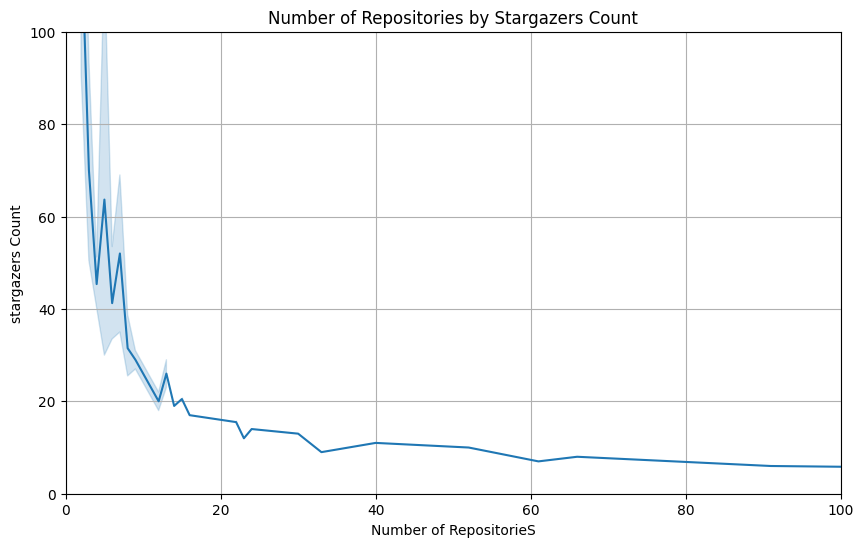

In [43]:


plt.figure(figsize=(10, 6))
sns.lineplot(y=stargazers_count['stargazers_count'], x=repos_count['repos_count'], palette='viridis')
plt.title('Number of Repositories by Stargazers Count')
plt.xlabel('Number of RepositorieS')
plt.ylabel('stargazers Count')
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

[12073, 280, 78, 48, 2, 0]


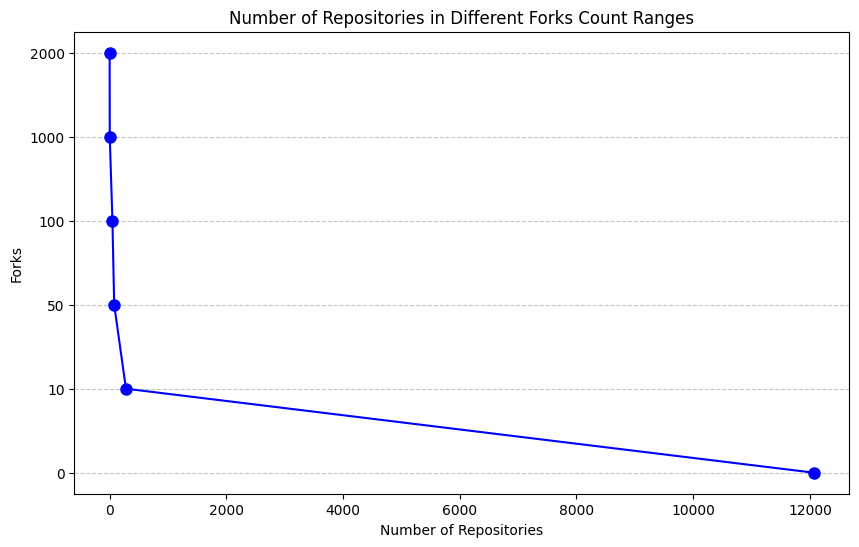

In [ ]:

less_than_500 = user_repos[user_repos['forks_count'] <= 10].shape[0]
more_than_500 = user_repos[user_repos['forks_count'] >= 10].shape[0]
more_than_1000 = user_repos[user_repos['forks_count'] >= 50].shape[0]
more_than_1500 = user_repos[user_repos['forks_count'] >= 100].shape[0]
more_than_2000 = user_repos[user_repos['forks_count'] >= 1000].shape[0]
more_than_2500 = user_repos[user_repos['forks_count'] >= 2000].shape[0]

categories = ['0', '10', '50', '100', '1000', '2000']
counts = [less_than_500, more_than_500, more_than_1000, more_than_1500, more_than_2000, more_than_2500]
print(counts)

plt.figure(figsize=(10, 6))
plt.plot(counts, categories, marker='o', linestyle='-', color='b', markersize=8)

plt.title('Number of Repositories in Different Forks Count Ranges')
plt.xlabel('Number of Repositories')
plt.ylabel('Forks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[2111, 972, 538, 320, 190, 108, 66, 35, 16, 4, 2, 1]


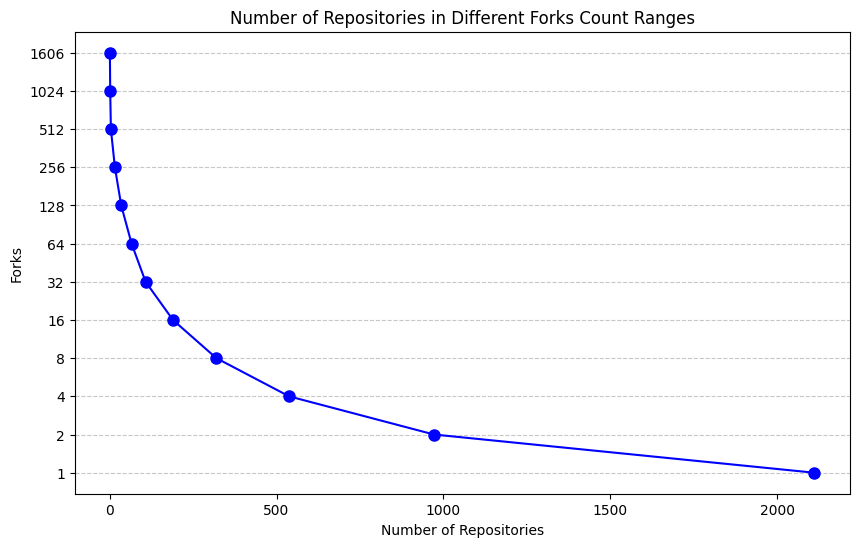

In [59]:
# Define the cap and the base for the logarithmic growth
max_threshold = user_repos['forks_count'].max()  # This is your cap (maximum value of forks to consider)
base = 2  # Base for the logarithmic scale, you can change this to control the rate of growth

# Generate logarithmic thresholds (e.g., 1, 2, 5, 10, 20, 50, 100, etc.)
thresholds = [base ** i for i in range(0, int(np.log(max_threshold) / np.log(base)) + 1)]
thresholds.append(max_threshold)  # Adding the cap as the last threshold

# Prepare category labels based on thresholds
categories = [str(threshold) for threshold in thresholds]

# Count how many repositories fall into each threshold
counts = [user_repos[user_repos['forks_count'] >= threshold].shape[0] for threshold in thresholds]

# Print the counts for each threshold
print(counts)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(counts, categories, marker='o', linestyle='-', color='b', markersize=8)

plt.title('Number of Repositories in Different Forks Count Ranges')
plt.xlabel('Number of Repositories')
plt.ylabel('Forks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_35220/32306203.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='stargazers_count', y='repos_count', data=stargazers_count, palette='viridis')


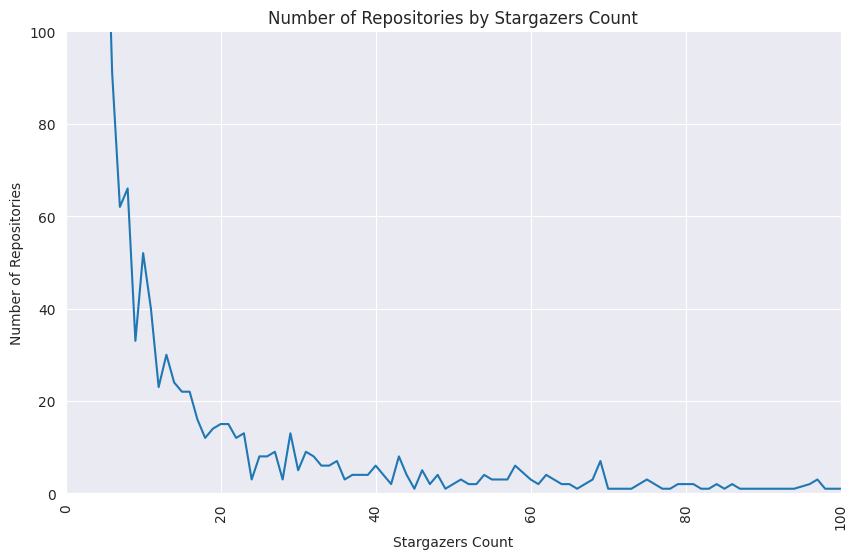

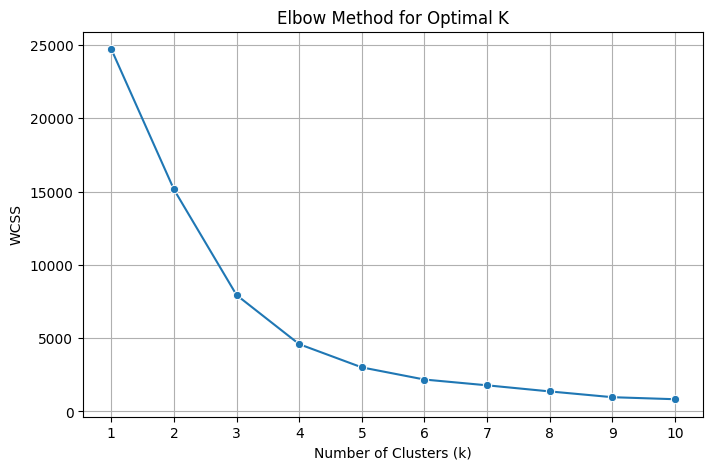

In [ ]:
# K-MEANS
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = user_repos[['forks_count', 'size']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_range), y=wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [30]:
# SETTING PLOT READY DATA
from kneed import KneeLocator

X = user_repos[['forks_count', 'size']]

X_scaled = StandardScaler().fit_transform(X)

# Compute WCSS
wcss = []
k_values = list(range(1, 11))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Find elbow point
knee = KneeLocator(k_values, wcss, curve="convex", direction="decreasing")
elbow_k = knee.elbow

# Prepare data for frontend
output = {
    "elbow_k": int(elbow_k),  # convert numpy int64 to native int
    "points": [{"k": int(k), "wcss": float(w)} for k, w in zip(k_values, wcss)]
}
# Export as JSON
with open("../data/plot_ready/forks__size.json", "w") as f:
    json.dump(output, f)

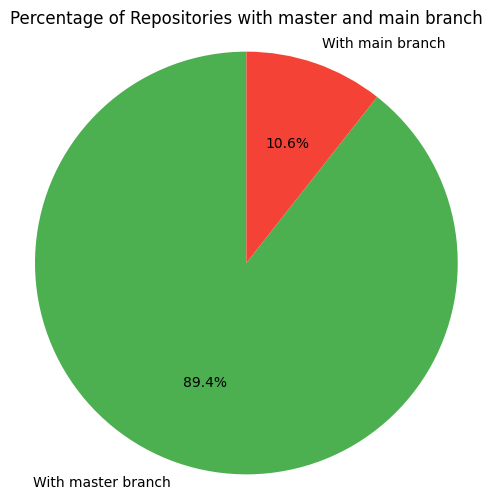

In [34]:
with_master = user_repos[user_repos['default_branch'] == 'master'].shape[0]
with_main = user_repos[user_repos['default_branch'] == 'main'].shape[0]

labels = ['With master branch', 'With main branch']
sizes = [with_master, with_main]
total = with_master + with_main

data = [
    {"label": "master", "percentage": round((with_master / total) * 100, 1)},
    {"label": "main", "percentage": round((with_main / total) * 100, 1)}
]

with open("../data/plot_ready/branch_data.json", "w") as f:
    json.dump(data, f, indent=2)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.axis('equal')
plt.title('Percentage of Repositories with master and main branch')
plt.show()

In [ ]:
# GET TOP STARED (10)
top_starred = user_repos.sort_values("stargazers_count", ascending=False).head(10)
data = [
    {"repo": row["name"], "stars": int(row["stargazers_count"])}
    for _, row in top_starred.iterrows()
]

with open("../data/plot_ready/top_starred.json", "w") as f:
    json.dump(data, f, indent=2)

In [39]:
# GET CREATED PER YEAR

user_repos["created_at"] = pd.to_datetime(user_repos["created_at"])
user_repos["created_year"] = user_repos["created_at"].dt.year

created_by_year = user_repos["created_year"].value_counts().sort_index()

data = [{"year": int(year), "count": int(count)} for year, count in created_by_year.items()]

with open("../data/plot_ready/created_year.json", "w") as f:
    json.dump(data, f, indent=2)

In [ ]:
# STARTS VS ISSUES
filtered = user_repos[(user_repos['stargazers_count'] > 0) | (user_repos['open_issues_count'] > 0)]

data = [
    {
        "repo": row["name"],
        "stars": int(row["stargazers_count"]),
        "issues": int(row["open_issues_count"])
    }
    for _, row in filtered.iterrows()
]

with open("../data/plot_ready/issues_vs_stars.json", "w") as f:
    json.dump(data, f, indent=2)

In [ ]:
# STARS OVER TIME
user_repos['created_at'] = pd.to_datetime(user_repos['created_at'])
user_repos['created_year'] = user_repos['created_at'].dt.year

stars_per_year = user_repos.groupby('created_year')['stargazers_count'].sum().reset_index()

stars_data = stars_per_year.to_dict(orient="records")
with open("../data/plot_ready/stars_over_time.json", "w") as f:
    json.dump(stars_data, f, indent=2)

In [1]:
analisis = user_repos

NameError: name 'user_repos' is not defined